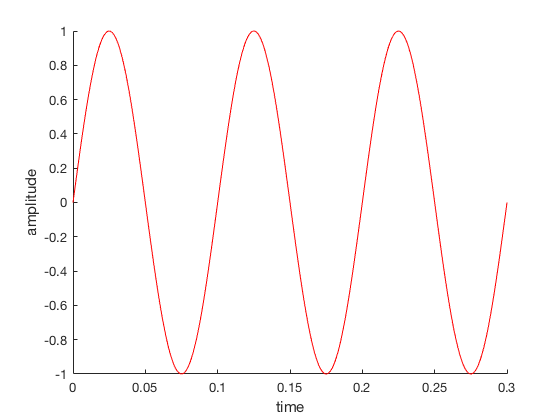

In [35]:
%%make some waves
% amp * sin(2 * pi * freq * (time + phase))
t = 0:.001:.3;
r = 1 * sin(2 * pi * 10 * t);

fh = figure();
ah = axes('parent', fh);

lh = line(t, r, 'color', 'r', 'parent', ah);
xlabel('time')
ylabel('amplitude')


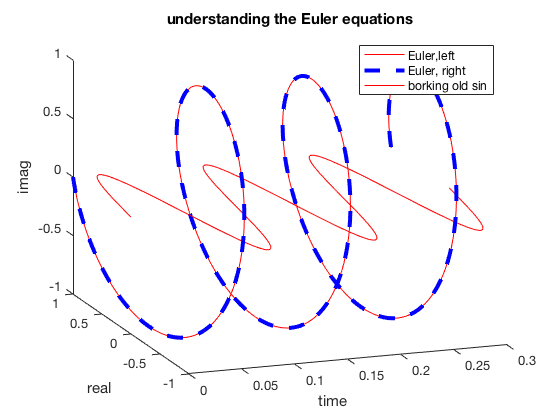

In [36]:
%%make some complex sin waves
% Eulers formula isnt scary
% left side: exp(1j())
% right side: cos() + jsin() 
% in the dtft we use a variation on that theme.
% exp(1j()) = cos() + -jsin()
% in this case:
% imag() of this looks like -sin() 
% real() of this looks like  cos()

% take a look for yourself
left_side_euler = 1 * exp(-1j * 2 * pi * 10 * t);
right_side_euler = cos(2*pi*10*t) - i*sin(2*pi*10*t);
lh(1) = line(t, real(right_side_euler), imag(right_side_euler), 'color', 'r');
lh(2)= line(t, real(left_side_euler), imag(left_side_euler), 'linestyle',...
 '--', 'color', 'b', 'linewidth', 3);
lh(3) = line(t, r, 'color', 'r');

% pretty
xlabel('time')
ylabel('real')
zlabel('imag')
legend([lh(:)], {'Euler, right', 'Euler, left', 'borking old sin'}) 
title('understanding the Euler equations');
view(-20, 20)

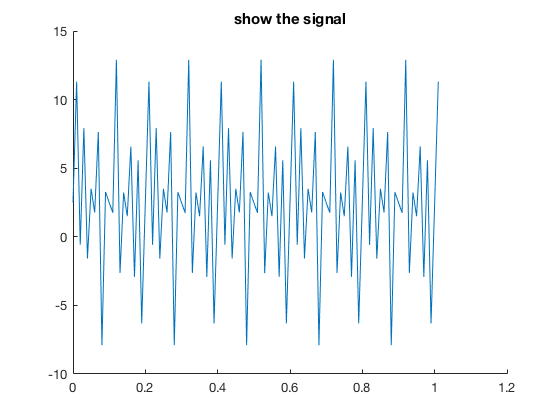

In [37]:
%% Make Signal
% parameters of the waves
amps = [2 3 4 5];
freaks = [10 20 35 45];
offs = [1 .5 1 0];
phs = [0 0 0 0];
binsize = .01;
tims = 0:binsize:1+binsize;
sig = zeros(numel(amps), numel(tims));

% build each wave
for idx = 1:numel(amps)
	sig(idx, :) = amps(idx) * sin(2*pi * freaks(idx)...
	* (tims + (2*pi*phs(idx)))) + offs(idx);
end

% sum up duh waves
tot_sig = sum(sig, 1);
norm_tot_sig = tot_sig/norm(tot_sig);

% plot duh wave
fh2 = figure();
ah2 = axes('parent', fh2);
lh2(1) = line(tims, tot_sig);
title(ah2, 'show the signal');


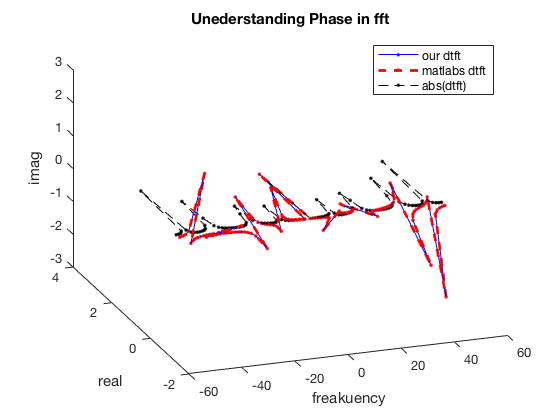

In [38]:
%% DTFT
% Note: Lets just drop time temporarily, even though it may feel weird,
%       lets think about our signal just as having a # of samples
%       from the zeroth sample to the n-th sample.
samples = [0:numel(tims)-1] / numel(tims);

% nyquist limit (number of unique frequencies)
ny_lim = numel(tims)/2 + 1;

% largest frequency Hz
seconds = max(tims) - min(tims);
Hz = numel(samples)/seconds;
large_freak = Hz/2;

% dtft body
four = zeros(size(tot_sig));
for fidx = 1:numel(samples) % length of the sequence (hint: this is just a linear spacing of frequencies)
	sw = 1 * exp(-1j*2*pi*(fidx-1) .* samples);
	norm_sw = sw/norm(sw);
	four(fidx) = sum([tot_sig.*sw]);
end
ff = fft(tot_sig); % check just in case :-)

%% convert to useful scale
nf = numel(tims)/2 + 1;
freq_axis = linspace(0, large_freak, ny_lim); % (Note resolved: frequencies back into context)
freq_axis_plot = [-fliplr(freq_axis(2:end-1)), freq_axis];
man_four = four/numel(tot_sig);
mat_four = ff/numel(tot_sig);

fh3 = figure();
ah3 = axes('parent', fh3);

% trick to get matlab to plot negative freq the way its natural to see it
freq_index = [numel(freq_axis)+1:numel(freq_axis_plot), 1:numel(freq_axis)];
p_man_four = man_four(freq_index);
p_mat_four = mat_four(freq_index);

% draw lines
lh3(3) = line(freq_axis_plot, real(abs(p_man_four)), imag(abs(p_man_four)),...
 'linestyle', '--', 'marker', '.', 'color', 'k');
lh3(1) = line(freq_axis_plot, real(p_man_four), imag(p_man_four), 'linestyle',...
 '-', 'marker', '.', 'color', 'b');
lh3(2) = line(freq_axis_plot, real(p_mat_four), imag(p_mat_four), 'marker',...
 '.', 'color', 'r', 'linewidth', 2, 'linestyle', '--');

% pretty
title(ah3,'Unederstanding Phase in fft');
legend(lh3(:), {'our dtft', 'matlabs dtft', 'abs(dtft)'});
xlabel('freakuency')
ylabel('real')
zlabel('imag')
view(-20, 30)